# Steady-state simulation of organic light emitting cell

This is an example of steady-state simulation of the light emitting electrochemical cell.

It attempts to reproduce [reference](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.66.235210). Exact agreement is not achieved probably because of missing details regarding the electrode model. As in the reference, the temperature equal to 2500 K is assumed.

In [1]:
from oedes.fvm import mesh1d
from oedes.models import lec
from oedes import progressbar, testing, init_notebook
init_notebook()
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

## Model and parameters

In [2]:
params = {'T': 2500.,
          'electron.mu': 1e-6,
          'electron.level': 0.,
          'electron.N0': 5e26,
          'hole.mu': 1e-6,
          'hole.level': 5.,
          'hole.N0': 5e26,
          'electrode0.workfunction': 2.5,
          'electrode0.voltage': 2.,
          'electrode1.workfunction': 2.5,
          'electrode1.voltage': 0.,
          'cation.mu': 1e-6,
          'anion.mu': 1e-6,
          'npi': 2e43,
          'epsilon_r': 3.
          }

In [3]:
L = 350e-9
mesh = mesh1d(L=L, epsilon_r=3.4)
cinit = 1.25e25
model = lec.LEC(mesh)
xinit = lec.initial_salt(model, cinit)

In [4]:
for t, x, xt, outf in progressbar(lec.bdf1adapt(
        model, xinit, params, t=0., t1=1., dt=1e-10, reltol=1, abstol=1e15, relfail=20.)):
    pass

In [5]:
o = outf()
m = mesh

## Results

### Distribution of cations and anions

(1e+23, 1e+27)

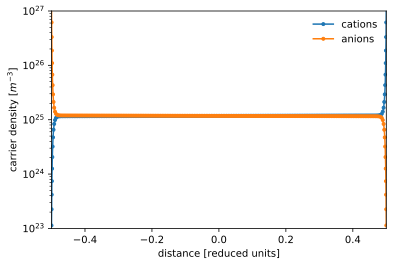

In [6]:
plt.plot(m.cells['center'] / L - 0.5, o['cation.c'], '.-', label='cations')
plt.plot(m.cells['center'] / L - 0.5, o['anion.c'], '.-', label='anions')
testing.store(o['cation.c'], rtol=1e-6)
testing.store(o['anion.c'], rtol=1e-6)
plt.yscale('log')
plt.legend(loc=0, frameon=False)
plt.ylabel('carrier density [$m^{-3}$]')
plt.xlabel('distance [reduced units]')
plt.xlim([-0.5, 0.5])
plt.ylim([1e23, 1e27])

### Distribution of the electric field

Text(0,0.5,'electric field [$Vm^{-1}$]')

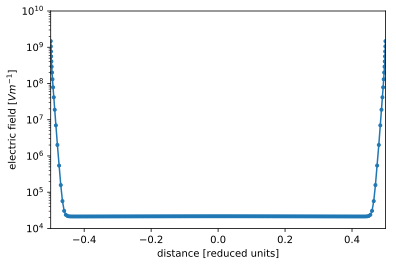

In [7]:
testing.store(o['E'], rtol=1e-6)
plt.plot(m.faces['center'] / L - 0.5, o['E'], '.-')
plt.yscale('log')
plt.ylim([1e4, 1e10])
plt.xlim([-0.5, 0.5])
plt.xlabel('distance [reduced units]')
plt.ylabel('electric field [$Vm^{-1}$]')

### Distribution of electrons and holes

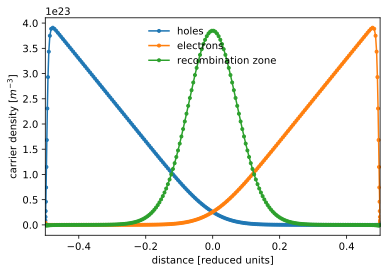

In [8]:
plt.plot(m.cells['center'] / L - 0.5, o['hole.c'], '.-', label='holes')
plt.plot(m.cells['center'] / L - 0.5, o['electron.c'], '.-', label='electrons')
plt.plot(
    m.cells['center'] /
    L -
    0.5,
    o['R'] *
    0.5e-7,
    '.-',
    label='recombination zone')
testing.store(o['hole.c'], rtol=1e-6)
testing.store(o['electron.c'], rtol=1e-6)
testing.store(o['R'], rtol=1e-6)
plt.xlabel('distance [reduced units]')
plt.ylabel('carrier density [$m^{-3}$]')
plt.xlim([-0.5, 0.5])
plt.legend(loc=0, frameon=False)

### Distribution of holes near to contact

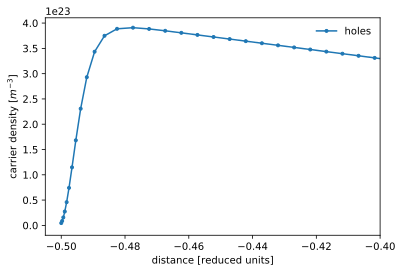

In [9]:
plt.plot(m.cells['center'] / L - 0.5, o['hole.c'], '.-', label='holes')
plt.xlabel('distance [reduced units]')
plt.ylabel('carrier density [$m^{-3}$]')
plt.xlim([-0.505, -0.4])
plt.legend(loc=0, frameon=False)

### Comparison between drift and diffusion parts of the current

Text(0,0.5,'normalized current density')

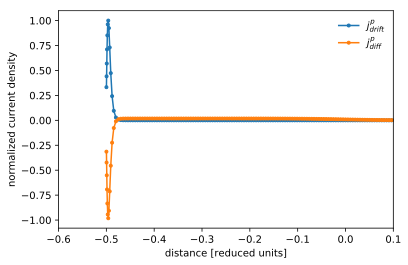

In [10]:
testing.store(o['hole.jdrift'], rtol=1e-6)
testing.store(o['hole.jdiff'], rtol=1e-6)
testing.store(o['electron.jdrift'], rtol=1e-6)
testing.store(o['electron.jdiff'], rtol=1e-6)
plt.plot(
    m.faces['center'] /
    L -
    0.5,
    o['hole.jdrift'] /
    np.amax(
        o['hole.jdrift']),
    '.-',
    label='$j^p_{drift}$')
plt.plot(
    m.faces['center'] /
    L -
    0.5,
    o['hole.jdiff'] /
    np.amax(
        o['hole.jdrift']),
    '.-',
    label='$j^p_{diff}$')
plt.xlim([-0.6, 0.1])
plt.legend(loc=0, frameon=False)
plt.xlabel('distance [reduced units]')
plt.ylabel('normalized current density')

## Reference

J. C. deMello, [Interfacial feedback dynamics in polymer light-emitting electrochemical cells](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.66.235210), Physical Review B 66 235210 (2002)


---
This file is a part of __oedes__, an open source organic electronic device 
simulator. For more information, see <https://www.github.com/mzszym/oedes>.
